In [97]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/food /Dirty_data.csv')

In [99]:
df

,Gender,Age,companion,Employment,Two_Four_Wheeler,Cinema_Likes,Money
0,2.0,23.0,NaN,4.0,1.0,NaN,731929.0
1,NaN,69.0,1.0,4.0,0.0,1.0,550729.0
2,2.0,66.0,0.0,1.0,0.0,NaN,627600.0
3,NaN,69.0,0.0,5.0,0.0,3.0,939720.0
4,NaN,68.0,0.0,1.0,0.0,3.0,666478.0
...,...,...,...,...,...,...,...
1096,2.0,22.0,0.0,5.0,0.0,2.0,727816.0
1097,1.0,25.0,0.0,3.0,0.0,1.0,559317.0
1098,1.0,22.0,1.0,5.0,1.0,2.0,741437.0
1099,2.0,21.0,0.0,4.0,1.0,2.0,766123.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1037 non-null   float64
 1   Age               1024 non-null   float64
 2   companion         1003 non-null   float64
 3   Employment        1044 non-null   float64
 4   Two_Four_Wheeler  1072 non-null   float64
 5   Cinema_Likes      1063 non-null   float64
 6   Money             1073 non-null   float64
dtypes: float64(7)
memory usage: 60.3 KB


In [101]:
df.describe()

,Gender,Age,companion,Employment,Two_Four_Wheeler,Cinema_Likes,Money
count,1037.000000,1024.000000,1003.00000,1044.000000,1072.000000,1063.000000,1.073000e+03
mean,1.505304,22.883789,0.47657,2.990421,0.473881,2.009407,7.538336e+05
std,0.500213,4.346791,0.49970,1.419594,0.499550,0.808329,1.796229e+05
min,1.000000,20.000000,0.00000,1.000000,0.000000,1.000000,1.228550e+05
25%,1.000000,21.000000,0.00000,2.000000,0.000000,1.000000,6.225260e+05
50%,2.000000,22.000000,0.00000,3.000000,0.000000,2.000000,7.582650e+05
75%,2.000000,24.000000,1.00000,4.000000,1.000000,3.000000,8.776560e+05
max,2.000000,69.000000,1.00000,5.000000,1.000000,3.000000,1.868869e+06


In [102]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1096     True
1097     True
1098     True
1099     True
1100     True
Length: 1101, dtype: bool

In [103]:
df.drop_duplicates()

,Gender,Age,companion,Employment,Two_Four_Wheeler,Cinema_Likes,Money
0,2.0,23.0,NaN,4.0,1.0,NaN,731929.0
1,NaN,69.0,1.0,4.0,0.0,1.0,550729.0
2,2.0,66.0,0.0,1.0,0.0,NaN,627600.0
3,NaN,69.0,0.0,5.0,0.0,3.0,939720.0
4,NaN,68.0,0.0,1.0,0.0,3.0,666478.0
...,...,...,...,...,...,...,...
995,2.0,22.0,0.0,5.0,0.0,2.0,727816.0
996,1.0,25.0,0.0,3.0,0.0,1.0,559317.0
997,1.0,22.0,1.0,5.0,1.0,2.0,741437.0
998,2.0,21.0,0.0,4.0,1.0,2.0,766123.0


In [104]:
p0 = df.Money.min()
p0

122855.0

In [105]:
p100 = df.Money.max()
p100

1868869.0

In [106]:
q1 = df.Money.quantile(0.25)  #25%  in Purchase
q1

622526.0

In [107]:
q2 = df.Money.quantile(0.5)    #50 %    in Purchase
q2

758265.0

In [108]:
q3 = df.Money.quantile(0.75)   #75%  in Purchase
q3

877656.0

In [109]:
iqr = q3 - q1

iqr

255130.0

In [110]:
lower_cutoff = q1 - 1.5*iqr

lower_cutoff

239831.0

In [111]:
upper_cutoff = q3 + 1.5*iqr

upper_cutoff

1260351.0

In [112]:
print("p0=",p0,
      "p100=",p100,
      "lc =",lower_cutoff,
      "uc =",upper_cutoff)

p0= 122855.0 p100= 1868869.0 lc = 239831.0 uc = 1260351.0


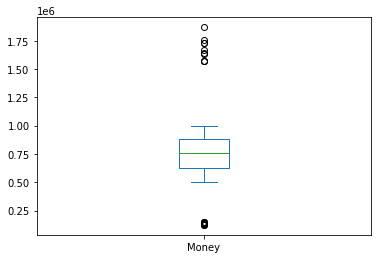

In [113]:
df.Money.plot(kind='box')

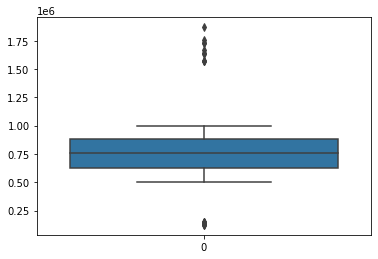

In [114]:
import seaborn as sns 
sns.boxplot(data=df['Money'])

In [115]:
#clipping all values greater  the upper cutoff to the upper cutoff

df.Money.clip(upper = upper_cutoff)


0       731929.0
1       550729.0
2       627600.0
3       939720.0
4       666478.0
          ...   
1096    727816.0
1097    559317.0
1098    741437.0
1099    766123.0
1100    749083.0
Name: Money, Length: 1101, dtype: float64

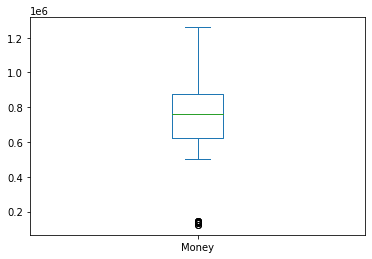

In [116]:
df.Money.clip(upper = upper_cutoff, inplace = True)
df.Money.plot(kind = 'box')

In [117]:
#Handling Missing Values 

df.isna().sum()

Gender              64
Age                 77
companion           98
Employment          57
Two_Four_Wheeler    29
Cinema_Likes        38
Money               28
dtype: int64

In [118]:
#Precentage of missing values

df.isna().sum()/df.shape[0]

Gender              0.058129
Age                 0.069936
companion           0.089010
Employment          0.051771
Two_Four_Wheeler    0.026340
Cinema_Likes        0.034514
Money               0.025431
dtype: float64

In [119]:
df.Gender.mode()

0    2.0
dtype: float64

In [120]:
df.Gender.mode()[0]

2.0

In [121]:
df.Gender.fillna(df.Gender.mode()[0],inplace = True)

In [122]:
df.isna().sum().sort_values(ascending = False)

companion           98
Age                 77
Employment          57
Cinema_Likes        38
Two_Four_Wheeler    29
Money               28
Gender               0
dtype: int64

In [123]:
df.Age.mode()
df.Age.fillna(df.Age.mode()[0],inplace = True)
df.isna().sum().sort_values(ascending = False)

companion           98
Employment          57
Cinema_Likes        38
Two_Four_Wheeler    29
Money               28
Gender               0
Age                  0
dtype: int64

In [124]:
df.Employment .mode()
df.Employment .fillna(df.Employment .mode()[0],inplace = True)
df.isna().sum().sort_values(ascending = False)

companion           98
Cinema_Likes        38
Two_Four_Wheeler    29
Money               28
Gender               0
Age                  0
Employment           0
dtype: int64

In [125]:
df.companion .mode()
df.companion .fillna(df.companion .mode()[0],inplace = True)
df.isna().sum().sort_values(ascending = False)

Cinema_Likes        38
Two_Four_Wheeler    29
Money               28
Gender               0
Age                  0
companion            0
Employment           0
dtype: int64

In [126]:
df.Cinema_Likes  .mode()
df.Cinema_Likes  .fillna(df.Cinema_Likes  .mode()[0],inplace = True)
df.isna().sum().sort_values(ascending = False)

Two_Four_Wheeler    29
Money               28
Gender               0
Age                  0
companion            0
Employment           0
Cinema_Likes         0
dtype: int64

In [127]:
df.Two_Four_Wheeler.mode()
df.Two_Four_Wheeler.fillna(df.Two_Four_Wheeler.mode()[0],inplace = True)
df.isna().sum().sort_values(ascending = False)

Money               28
Gender               0
Age                  0
companion            0
Employment           0
Two_Four_Wheeler     0
Cinema_Likes         0
dtype: int64

In [128]:
df.Money .mode()
df.Money .fillna(df.Money .mode()[0],inplace = True)
df.isna().sum().sort_values(ascending = False)

Gender              0
Age                 0
companion           0
Employment          0
Two_Four_Wheeler    0
Cinema_Likes        0
Money               0
dtype: int64

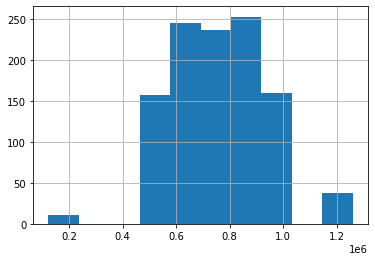

In [129]:
import matplotlib.pyplot as plt
df.Money.hist()
plt.show()

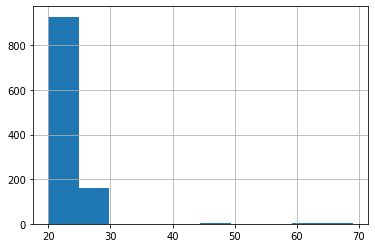

In [130]:
df.Age.hist()

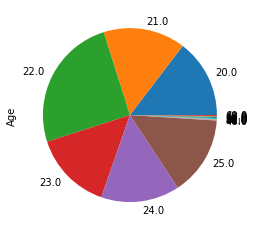

In [131]:
# Compositon of city_category
df.groupby('Age').Age.count().plot(kind='pie')
plt.show()

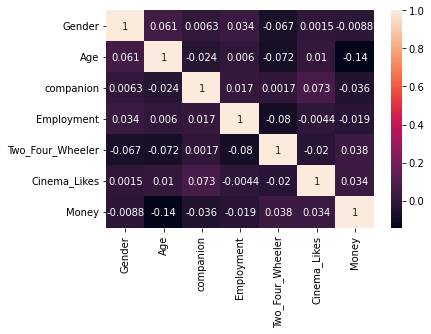

In [132]:
# Heat map
#df.select_dtype(['float64','int64']).corr()


sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()

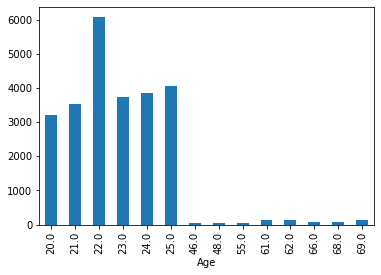

In [133]:
df.groupby('Age').Age.sum().plot(kind='bar')
plt.show()

In [134]:
df.groupby('Age').Age.sum()

Age
20.0    3220.0
21.0    3528.0
22.0    6072.0
23.0    3726.0
24.0    3864.0
25.0    4050.0
46.0      46.0
48.0      48.0
55.0      55.0
61.0     122.0
62.0     124.0
66.0      66.0
68.0      68.0
69.0     138.0
Name: Age, dtype: float64

<BarContainer object of 14 artists>

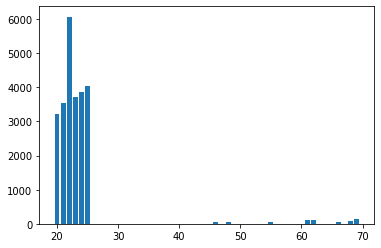

In [135]:
summary= df.groupby('Age').Age.sum()
plt.bar(x=summary.index , height=summary.values)